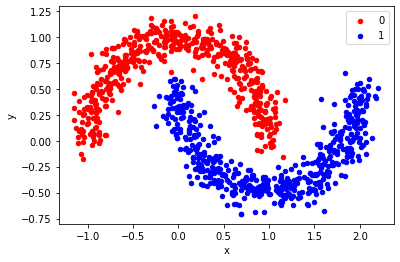

In [0]:
import numpy as np
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from pandas import DataFrame

# Generate a 2D classification dataset
X, Y = make_moons(n_samples=1000, noise=0.1)
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=Y))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

In [0]:
print(X.shape)
print(Y.shape)

(1000, 2)
(1000,)


In [0]:
Y = Y.reshape(1, -1)
X = X.T

In [0]:
print(X.shape)
print(Y.shape)

(2, 1000)
(1, 1000)


In [0]:
#Let us define the architecture of the neural network
input_size = 2
hidden_layers = 2
hidden_layers_size = [64, 64]
output_size = 1 

In [0]:
#Initializing parameters

np.random.seed(42)  #for quicker convergence

W1 = np.random.randn(hidden_layers_size[0], input_size)
b1 = np.random.randn(hidden_layers_size[0], 1)
W2 = np.random.randn(hidden_layers_size[1], hidden_layers_size[0])
b2 = np.random.randn(hidden_layers_size[1], 1)
W3 = np.random.randn(output_size, hidden_layers_size[0])
b3 = np.random.randn(output_size, 1)


In [0]:
def crossentropy(yp, y1):

    loss = -1/1000 * np.sum((np.multiply(y1, np.log(yp)) + 
                           np.multiply(1-y1, np.log(1-yp))))
    return loss

def crossentropy_backward(yp, y1):

    dyp = -1/1000 * ((y1/yp) - (1-y1)/(1-yp))

    return dyp

In [0]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def sigmoid_backward(z, da):                            # The da term signifies the gradient of a w.r.t. to the variable that it was used to compute
    return da * sigmoid(z) * (1-sigmoid(z))

In [0]:
def predictions(y):
    for i, ys in enumerate(y.T):
        if ys > 0.5:
            ys = 1
        else:
            ys = 0
        y.T[i] = ys
    return y
    
def calc_accuracy(a, y):
    correct = 0
    total = 1000  
    correct += np.sum(a == y)
    return (correct/total)

In [0]:
num_epochs = 100
learning_rate = 0.05

losses = []
accuracies = []

for epoch in range(num_epochs):
    z1 = np.matmul(W1, X) + b1
    a1 = sigmoid(z1)
    z2 = np.matmul(W2, a1) + b2
    a2 = sigmoid(z2)
    z3 = np.matmul(W3, a2) + b3
    a3 = sigmoid(z3)

    loss = crossentropy(a3, Y)

    da3 = crossentropy_backward(a3, Y)
    dz3 = sigmoid_backward(z3, da3)
    dW3 = np.matmul(dz3, a2.T)
    da2 = np.matmul(W3.T, dz3)
    db3 = np.sum(dz3, 1)
    dz2 = sigmoid_backward(z2, da2)
    dW2 = np.matmul(dz2, a1.T)
    da1 = np.matmul(W2.T, dz2)
    db2 = np.sum(dz2, 1)
    dz1 = sigmoid_backward(z1, da1)
    dW1 = np.matmul(dz1, X.T)
    db1 = np.sum(dz1, 1)

    print('loss for epoch {} = {}'.format(epoch+1, loss))
    prediction = predictions(a3)
    accuracy = calc_accuracy(prediction, Y)

    losses.append(loss)
    accuracies.append(accuracy)


    print('accuracy for epoch {} = {}'.format(epoch+1, accuracy))

    #updating parameters
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1.reshape(-1, 1)
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2.reshape(-1, 1)
    W3 -= learning_rate * dW3
    b3 -= learning_rate * db3.reshape(-1, 1)


loss for epoch 1 = 1.3330299427708696
accuracy for epoch 1 = 0.5
loss for epoch 2 = 0.8156181396082448
accuracy for epoch 2 = 0.343
loss for epoch 3 = 0.7193429160242011
accuracy for epoch 3 = 0.482
loss for epoch 4 = 0.6725691234893927
accuracy for epoch 4 = 0.534
loss for epoch 5 = 0.6330187399197851
accuracy for epoch 5 = 0.559
loss for epoch 6 = 0.5990159720379662
accuracy for epoch 6 = 0.571
loss for epoch 7 = 0.569604003264805
accuracy for epoch 7 = 0.591
loss for epoch 8 = 0.5440083710280237
accuracy for epoch 8 = 0.698
loss for epoch 9 = 0.5215983454411781
accuracy for epoch 9 = 0.739
loss for epoch 10 = 0.5018589185797179
accuracy for epoch 10 = 0.756
loss for epoch 11 = 0.48436828715949426
accuracy for epoch 11 = 0.768
loss for epoch 12 = 0.4687798934178713
accuracy for epoch 12 = 0.776
loss for epoch 13 = 0.4548080926760107
accuracy for epoch 13 = 0.79
loss for epoch 14 = 0.4422166817944412
accuracy for epoch 14 = 0.797
loss for epoch 15 = 0.4308096893790661
accuracy for epo

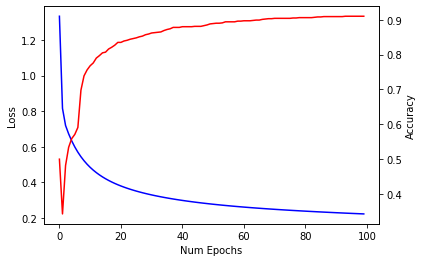

In [0]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax.plot(losses, color="blue")
ax.set_xlabel("Num Epochs")
ax.set_ylabel("Loss")

ax2 = ax.twinx()
ax2.plot(accuracies, color="red")
ax2.set_ylabel("Accuracy")

plt.show()